# Test on data that not in train or test set

In [2]:
IMG_PATH = 'C:\\Users\\Thrax\Desktop\\dog-breed-profile-golden-retriever-1117969-hero-da398f6462704058ace0ef5ae007866d.jpg'
UNIQUE_LIST = '../models/unique_breeds.pkl'
MODEL_PATH = '../models/model.h5'

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import tensorflow_hub as hub
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [4]:
IMG_size = 224

def process_image(image_path):
    """
    Taking path of an image and turn it into tensor
    """
    
    # Read an image file
    image = tf.io.read_file(image_path)
    
    # Convert the image into tensor
    image = tf.image.decode_jpeg(image, channels=3)

    # Convert color channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image shape (244,244)
    image = tf.image.resize(image, size=[IMG_size, IMG_size])

    return image

## Load the list of breeds and model

In [7]:
with open(UNIQUE_LIST, 'rb') as f:
   unique_list = pickle.load(f)

In [8]:
unique_list[:5]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier'], dtype=object)

In [9]:
model = tf.keras.models.load_model(MODEL_PATH,
                                     custom_objects={"KerasLayer":hub.KerasLayer})

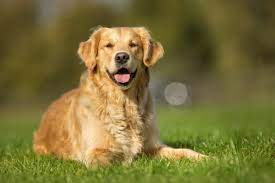

In [16]:
Image(IMG_PATH)

In [17]:
X = process_image(IMG_PATH)

In [18]:
X2 = tf.expand_dims(X, axis = 0)
X2.shape

TensorShape([1, 224, 224, 3])

In [19]:
y_pred = model.predict(X2)

In [20]:
unique_list[np.argmax(y_pred)]

'golden_retriever'

In [21]:
np.max(y_pred)

0.5909248